# 2-1 나무위키 최근 변경 페이지 키워드 분석하기

## 크롤링: 웹 데이터 가져오기

### [BeautifulSoup을 이용해 웹 크롤링하기]

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

In [30]:
# brew로 설치된 chromedriver의 path
path = "/Users/yanghaejun/opt/homebrew/Caskroom/chromedriver/chromedriver_mac64/chromedriver"

# 접속할 페이지 주소
source_url = "https://namu.wiki/RecentChanges"

# 페이지 접속
driver = webdriver.Chrome(path)
driver.get(source_url)

# 사이트의 html 구조에 기반하여 크롤링을 수행
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
contents_table = soup.find(name = "table")
contents_tbody = contents_table.find(name = "tbody")
contents_tr = contents_tbody.find_all(name = "tr")

# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성
base_url = "https://namu.wiki"
page_urls = []

for content_tr in contents_tr:
    content_td = content_tr.find_all(name = "td")[0]
    try:
        contents_a = content_td.find_all(name = "a")[0]
        url = contents_a.get("href")
        page_url = base_url + url
        page_urls.append(page_url)
    except:
        continue

# 중복 url을 제거
page_urls = list(set(page_urls))

# 브라우저 종료
driver.close()

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_5754/2739013308.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


### [페이지내 텍스트 구조 확인]

In [93]:
driver = webdriver.Chrome(path)
driver.get(page_urls[0])
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
contents_div = soup.find(name = "div", attrs = {"class": "t6-tWlbV"})
title = contents_div.find(name = "h1")
contents_ul = contents_div.find_all(name = "ul")
category = contents_ul[0]
content_paragraphs = contents_div.find(name = "div", attrs = {"class": "m5t+tA2K"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print()
print(category.text)
print()
print(content_corpus)

# 브라우저 종료
driver.close()

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_5754/2097634595.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


더 뉴 데이 

WWE프로레슬링 태그팀 및 스테이블

 WWE 스맥다운 태그팀 & 스테이블  [ 펼치기 · 접기 ] 블러드라인더 뉴 데이바이킹 레이더스임페리움브롤링 브루츠맥시멈 메일 모델스히트 로우레가도 델 판타스마우소즈로스 로사리오즈 THE NEW DAY 1. 프로필2. 소개3. 활동3.1. 세 남자의 만남3.2.  결성 초기. New Day Sucks! 를 받던 비인기 시절3.3. 관중들의 응원을 받기 시작하다3.4. 턴페이스와 WWE 최장수 태그팀 챔피언3.5. 레슬매니아 33의 호스트 그리고 스맥다운행3.6. 천하를 거머쥐다3.7. 당분간 2인 체제로 그리고 다시 태그팀 디비전의 터줏대감으로3.8. 빅 E 혼자 New Day Rocks(2020. 07. 24 ~ 2020. 10. 09.)3.9. 아홉 번째 챔피언 등극. 그러나 브랜드 분열로 인한 2인 체제. 브랜드 이동으로 인한 10번째 챔피언 등극(2020. 10. 9 ~ 2020. 12. 20)3.10. 열한 번째 챔피언 등극. 또 다시 2인조, 뉴 데이 왕조(2021 ~ 2022. 3)3.11. 완전체를 코 앞에 두고 찾아온 시련(2022. 3 ~ 2022. 12)3.12. 트리플 크라운 달성(2022. 12 ~ )4. 여담5. 기타 정보6. 둘러보기1. 프로필[편집]  SMACKDOWNThe New Day (더 뉴 데이)멤버코피 킹스턴빅 E재비어 우즈[1]테마곡New Day, New Way (2014~ )피니쉬 무브미드나잇 아워(Midnight hour)[2]주요 커리어WWE 챔피언 2회[3]  WWE 태그팀 챔피언/WWE RAW 태그팀 챔피언 4회  WWE 스맥다운 태그팀 챔피언 7회  2021년 킹 오브 더 링 우승[4] NXT 태그팀 챔피언 1회[5]2. 소개[편집]Oh (개최지)[6]!!, Don't you dare Be sour!Clap! For your world famous ○○ times champs![7]And, FEEL THE POWER!!![8]짜증내지 말고, 세계에서 가장 

 ### [나무위키의 최근 변경 데이터 크롤링하기]

In [97]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns = columns)

# 각 페이지별 "제목", "카테고리", "본문" 정보를 데이터 프레임으로 만듦
for page_url in page_urls:
    driver = webdriver.Chrome(path)
    driver.get(page_url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    contents_div = soup.find(name = "div", attrs = {"class": "t6-tWlbV"})
    title = contents_div.find(name = "h1")
    
    # 카테고리 정보가 없는 경우를 확인
    try:
        contents_ul = contents_div.find_all(name = "ul")
        category = contents_ul[0]
    except:
        category = None

    content_paragraphs = contents_div.find(name = "div", attrs = {"class": "m5t+tA2K"})
    content_corpus_list = []

    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출. 만약 없는 경우, 빈 문자열로 대체
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출. 만약 없는 경우, 빈 문자열로 대체
    for paragraphs in content_paragraphs:
        try:
            content_corpus_list.append(paragraphs.text.replace("\n", " "))
        except:
            content_corpus_list.append("")

    # 페이지 내 카테고리 정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추츨. 만약 없는 경우, 빈 문자열로 대체
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = None
    
    # 모든 정보를 하나의 데이터 프레임에 저장
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index = df.columns)
    df = df.append(series, ignore_index = True)

    # 브라우저 종료
    driver.close()

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_5754/1325502894.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_5754/1325502894.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index = True)


In [99]:
df.to_csv("/Users/yanghaejun/Desktop/namuwikidata.csv", index = False)

In [2]:
df = pd.read_csv("/Users/yanghaejun/Desktop/namuwikidata.csv")

## 추출: 키워드 정보 추출하기

### [텍스트 데이터 전처리하기]

In [3]:
# 텍스트 정제 함수: 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile("[^ ㄱ-ㅣ가-힣]+")
    result = hangul.sub(repl = "", string = text)
    return result

In [4]:
# 각 피처마다 전처리 사용
df["title"] = df["title"].apply(lambda x: text_cleaning(x))
df["category"] = df["category"].apply(lambda x: text_cleaning(x))
df["content_text"] = df["content_text"].apply(lambda x: text_cleaning(x))

In [5]:
df

,title,category,content_text
0,허니츄러스,년 출생키리누키 제작 유튜버대한민국의 여성 유튜버한국어 버츄얼 유튜버트위치 스트리머...,가입 후 일이 지나야 편집 가능한 문서입니다 역사 문단의 유튜브 내용 기재 ...
1,영웅사운드트랙,영화 음악,상위 문서 영웅영웅 발매일년 월 일장르영화 음악재생시간프로듀서오상준레이블지니뮤직...
2,이성준용사가 돌아왔다,용사가 돌아왔다등장인물,펼치기 접기 등장인물 평가 설정 썸네일 파괴 세력 용사김민수 전...
3,레이첼 싱클레어,히어로 킬러웹툰등장인물,네임리스 펼치기 접기 수장엔젠조직원이화존 나세벡터레이첼 싱클레어백지바그나레이첼 ...
4,성남 년리그,성남 역대 시즌,상위 문서 성남 년성남 리그 시즌성남 순위경기수승무패득점실점득실차승점 성남 ...
5,현대엘리베이터,현대그룹대한민국의 승강기 제조사년 기업코스피상장법인,펼치기 접기 계열사현대엘리베이터 현대아산 현대무벡스 현대경제연구원 현대...
6,자백,소송법,은는 여기로 연결됩니다 년 다큐멘터리 영화에 대한 내용은 자백 문서를의 번 문단...
7,송태섭,슬램덩크등장인물북산고교,상북 북산신성감독 안한수 채치수 권준호 정대만 이달재 송태섭 ...
8,배드 버니,년 출생미국 남가수미국의 남성 래퍼산후안 출신 인물프로레슬링 관련 인물,본명베니토 안토니오 마르티네스 오카시오 국적 미국 푸에르토리코출생년 월 일 세푸...
9,맘마 미아,년 영화뮤지컬 원작 영화미국의 뮤지컬 영화영국의 뮤지컬 영화미국의 로맨틱 코미디 영...,뮤지컬맘마 미아영화맘마 미아 년맘마 미아 년 맘마 미아 장르뮤지컬 ...


### [말뭉치 만들기]

In [6]:
# 각 피처마다 말뭉치를 생성
title_corpus = "".join(df["title"].tolist())
category_corpus = "".join(df["category"].tolist())
content_corpus = "".join(df["content_text"].tolist())
print(title_corpus)

허니츄러스 영웅사운드트랙 이성준용사가 돌아왔다 레이첼 싱클레어 성남 년리그 현대엘리베이터 자백 송태섭 배드 버니 맘마 미아  완전 평범한 보드 겜미스터리 카드   틀북산 실리콘 스톡스 버거킹 영웅사운드트랙 타라스크던전 앤 드래곤 시리즈 먹니 키리타니 하루카 성남 년리그 해외 삼성 라이온즈년스토브리그 미수옥 도지환 스로우 다운 좋아하면 울리는 짝짝짝 마지막 생존자 리그 오브 레전드룬마법 아벨 만성 콩팥병 용의 신전 성남 년리그 정부 보도   문제점 및 비판 송태섭 키리누키 나카무라 신스케 쿼터백 마인애플놀이터 야생 


### [konlpy를 이용해 키워드 추출하기]

In [7]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출
tagger = Okt()
nouns = tagger.nouns(content_corpus)
count = Counter(nouns)

In [8]:
count

Counter({'가입': 15,
         '후': 220,
         '편집': 559,
         '문서': 412,
         '역사': 341,
         '문단': 358,
         '유튜브': 34,
         '내용': 100,
         '기재': 12,
         '여부': 19,
         '대한': 116,
         '토론': 3,
         '진행': 53,
         '중인': 8,
         '일방': 3,
         '경우': 371,
         '관련': 70,
         '규정': 7,
         '제재': 3,
         '수': 614,
         '허니': 70,
         '츄러스': 64,
         '캐릭터': 95,
         '전체': 91,
         '접기': 48,
         '출생': 7,
         '년': 787,
         '월': 425,
         '일': 336,
         '국적': 10,
         '대한민국': 56,
         '여성': 22,
         '신체': 26,
         '퍼스': 10,
         '널': 17,
         '컬러': 1,
         '분홍색': 1,
         '활동': 53,
         '일째버튜버': 1,
         '데뷔': 63,
         '팬덤': 7,
         '비공식': 6,
         '과메기': 10,
         '플랫폼': 3,
         '현황': 5,
         '독자': 42,
         '명': 172,
         '실시간': 12,
         '회수': 17,
         '회': 25,
         '상수': 2,
         '개': 77,
         

### [키워드 가다듬기: 한 글자 키워드 제거하기]

In [9]:
# 한 글자 키워드를 제거
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'편집': 559, '문서': 412, '때문': 384, '경우': 371, '이전': 362, '문단': 358, '역사': 341, '쿼터백': 302, '송태섭': 284, '사용': 274, '이후': 237, '자신': 228, '정도': 228, '마지막': 202, '다른': 195, '생존자': 188, '위해': 176, '하나': 172, '사람': 166, '사실': 162, '게임': 159, '능력': 158, '공격': 158, '경기': 156, '영상': 154, '엘리베이터': 154, '선수': 150, '효과': 148, '하루': 147, '시간': 146, '상대': 146, '현대': 146, '문제': 143, '이상': 139, '또한': 134, '타라스크': 133, '이름': 132, '장비': 124, '설치': 124, '자백': 123, '가장': 122, '정대만': 122, '방송': 120, '챔피언': 120, '모습': 119, '매우': 118, '일본': 118, '레벨': 118, '대한': 116, '모두': 116, '모델': 114, '가드': 112, '모든': 111, '속도': 111, '세계': 110, '미수': 109, '우리': 107, '본인': 105, '부분': 105, '당시': 104, '상황': 104, '거의': 104, '북산': 104, '내용': 100, '추가': 100, '사망': 99, '강백호': 99, '채널': 96, '등장': 96, '캐릭터': 95, '플레이': 94, '가지': 94, '이유': 92, '인물': 92, '전체': 91, '다시': 91, '주문': 90, '현재': 89, '시즌': 89, '기관총': 89, '시작': 88, '기준': 87, '미국': 87, '존재': 86, '생각': 85, '다만': 85, '버거킹': 85, '적용': 83, '이용': 82, '패스': 82, '보병': 82, 

### [키워드 가다듬기: 불용어 사전]

In [10]:
# 한국어 약식 불용어 사전 예시 파일
korean_stopwords_path = "/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/korean_stopwords.txt"

# 텍스트 파일로 오픈
with open(korean_stopwords_path, encoding = "utf-8") as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

### [키워드 가다듬기: 불용어 제거하기]

In [11]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

# 키워드 데이터에서 불용어를 제거
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'이전': 362, '문단': 358, '역사': 341, '쿼터백': 302, '송태섭': 284, '마지막': 202, '생존자': 188, '위해': 176, '사람': 166, '게임': 159, '능력': 158, '공격': 158, '경기': 156, '영상': 154, '엘리베이터': 154, '선수': 150, '효과': 148, '하루': 147, '상대': 146, '현대': 146, '문제': 143, '타라스크': 133, '장비': 124, '설치': 124, '자백': 123, '정대만': 122, '방송': 120, '챔피언': 120, '일본': 118, '레벨': 118, '대한': 116, '모델': 114, '가드': 112, '속도': 111, '세계': 110, '미수': 109, '본인': 105, '부분': 105, '당시': 104, '북산': 104, '사망': 99, '강백호': 99, '채널': 96, '등장': 96, '캐릭터': 95, '플레이': 94, '가지': 94, '이유': 92, '전체': 91, '다시': 91, '주문': 90, '현재': 89, '시즌': 89, '기관총': 89, '시작': 88, '기준': 87, '미국': 87, '존재': 86, '버거킹': 85, '적용': 83, '이용': 82, '패스': 82, '보병': 82, '일차': 81, '키리누키': 81, '리타': 81, '스킬': 81, '상태': 80, '과거': 80, '마법': 80, '피해': 80, '출시': 80, '포지션': 79, '아이돌': 79, '실제': 78, '마음': 78, '원작': 77, '무기': 77, '소총': 77, '방법': 76, '자체': 75, '영화': 74, '기본': 74, '도나': 74, '개요': 73, '한국': 73, '라운드': 73, '이자': 72, '카드': 72, '이한나': 71, '농구': 71, '관련': 70, '허니': 70,

## 시각화: 워드 클라우드 시각화하기

### [pytagcloud 사용하기]

In [14]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어들을 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력. 단어 출력의 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)

# pytagcloud 이미지를 생성. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, "wordcloud.jpg", size = (900, 600), fontname = "NanumGothic", rectangular = False)

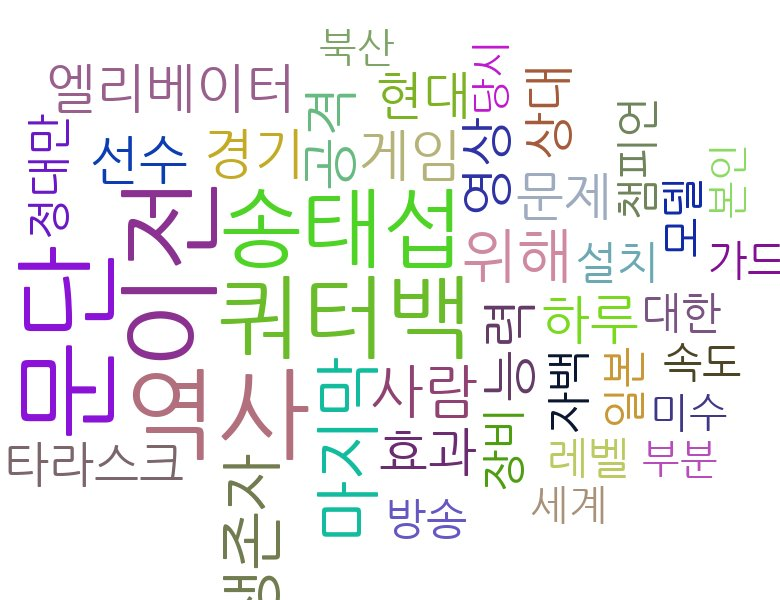

In [15]:
# 생성한 이미지를 출력
from IPython.display import Image
Image(filename = "wordcloud.jpg")

### [카테고리 키워드]

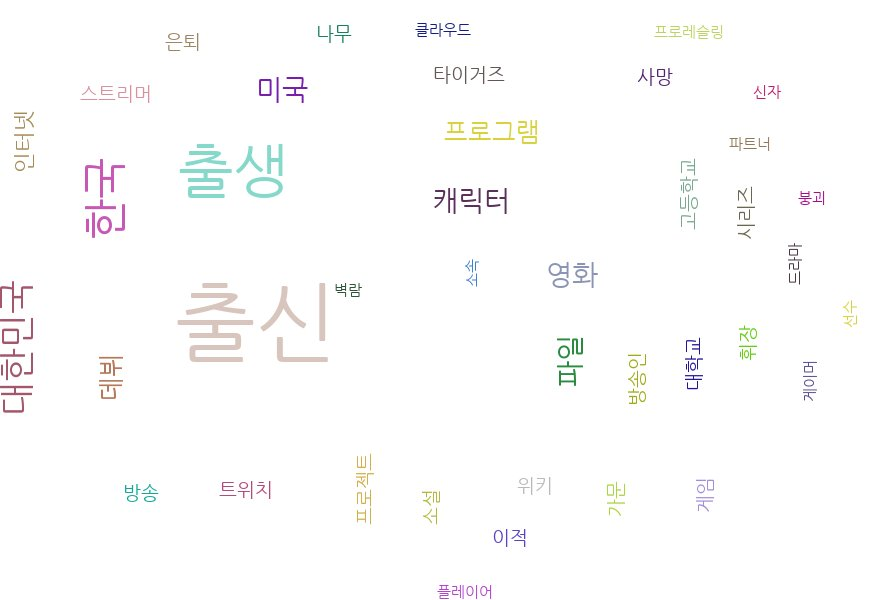

In [29]:
tagger = Okt()
nouns = tagger.nouns(category_corpus)
count = Counter(nouns)

# 한 글자 단어 및 불용어 제거
remove_char_counter = Counter({x: count[x] for x in count if len(str(x)) > 1})
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})

# 워드클라우드 이미지 출력
ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)
pytagcloud.create_tag_image(taglist, "category_wordcloud.jpg", size = (900, 600), fontname = "NanumGothic", rectangular = False)

Image(filename = "category_wordcloud.jpg")